<a href="https://colab.research.google.com/github/anaipsilva/TESE/blob/main/crop_limited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydicom dicom numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dicom
import cv2
import os

In [ ]:
# Read and store content
# of an excel file
read_file = pd.read_excel ("/content/drive/MyDrive/TESE/Annotation_Boxes.xlsx")

# Write the dataframe object
# into csv file
read_file.to_csv ("Annotations.csv",index = None, header=True)
	
# read csv file and convert
# into a dataframe object
df = pd.DataFrame(pd.read_csv("Annotations.csv"))

subdf1=((df.loc[473]).to_frame()).transpose()
subdf2=((df.loc[474]).to_frame()).transpose()
subdf3=((df.loc[475]).to_frame()).transpose()
subdf=subdf1.append(subdf2).append(subdf3)

# show the dataframe
subdf

,Patient ID,Start Row,End Row,Start Column,End Column,Start Slice,End Slice
473,Breast_MRI_474,129.0,182.0,118.0,164.0,70.0,106.0
474,Breast_MRI_475,298.0,427.0,107.0,139.0,91.0,116.0
475,Breast_MRI_476,345.0,393.0,148.0,186.0,78.0,96.0


In [ ]:
# Read and store content
# of an excel file
read_file = pd.read_excel ("/content/drive/MyDrive/TESE/recetores.xlsx")

# Write the dataframe object
# into csv file
read_file.to_csv("Recetores.csv",index = None, header=True)
	
# read csv file and convert
# into a dataframe object
dfc = pd.DataFrame(pd.read_csv("Recetores.csv"))

subdfc1=((dfc.loc[474]).to_frame()).transpose()
subdfc2=((dfc.loc[475]).to_frame()).transpose()
subdfc3=((dfc.loc[517]).to_frame()).transpose()
subdfc=subdfc1.append(subdfc2).append(subdfc3)

# show the dataframe
subdfc1

,Patient ID,ER,PR,HER2
474,474.0,0.0,0.0,0.0


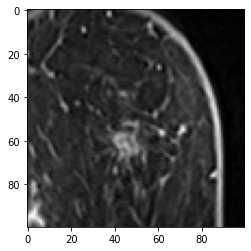

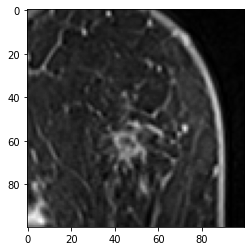

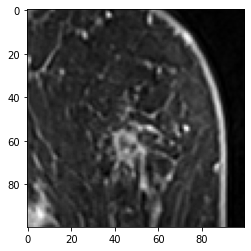

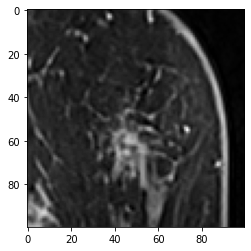

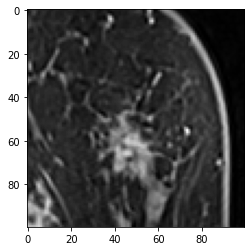

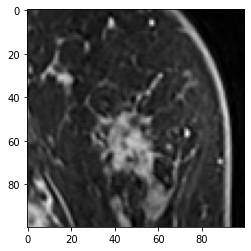

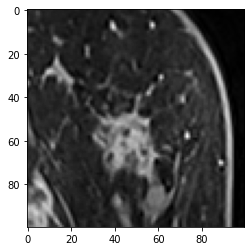

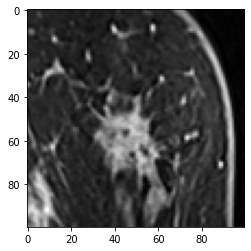

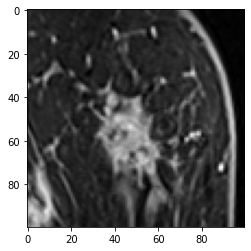

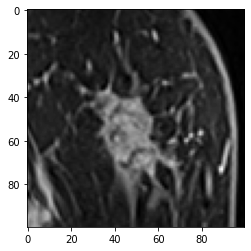

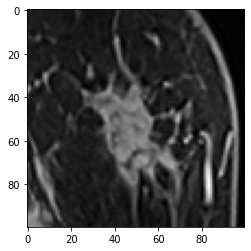

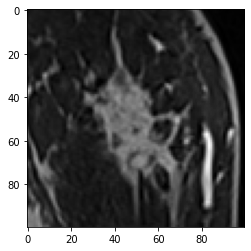

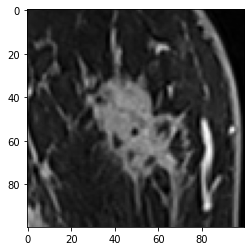

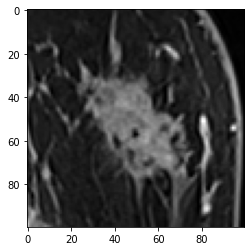

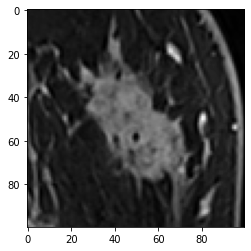

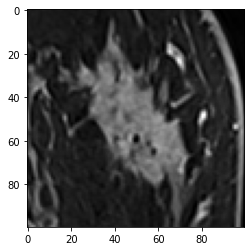

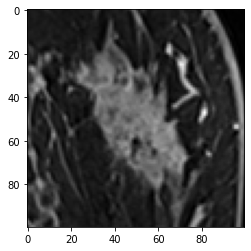

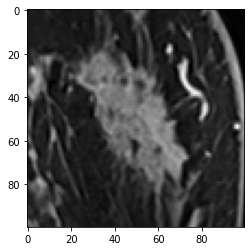

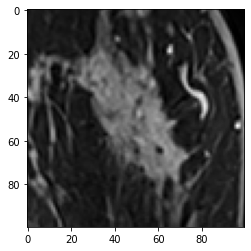

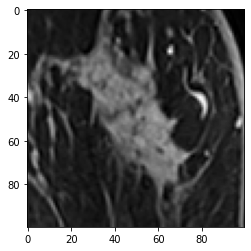

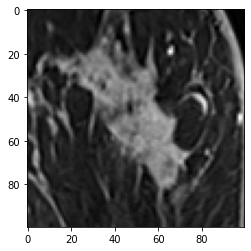

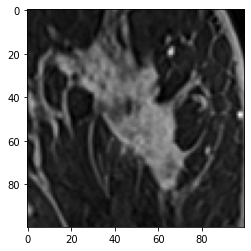

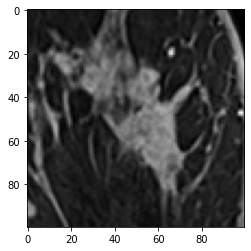

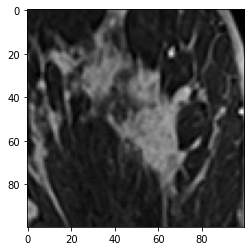

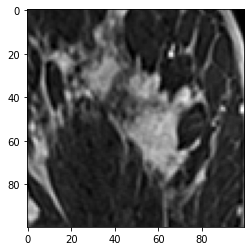

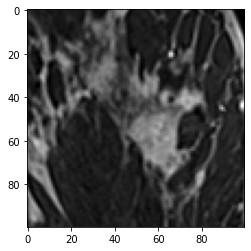

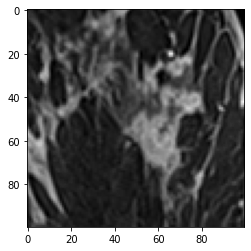

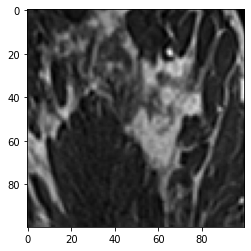

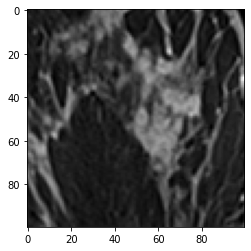

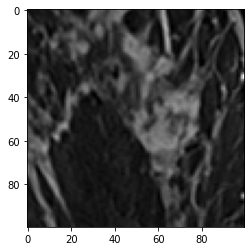

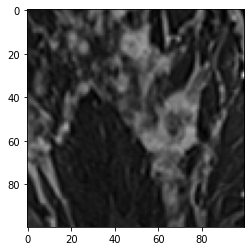

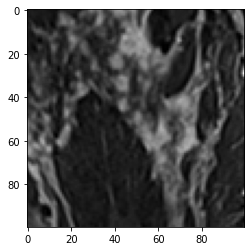

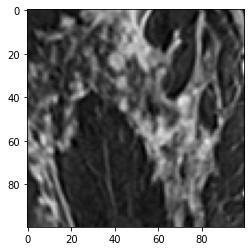

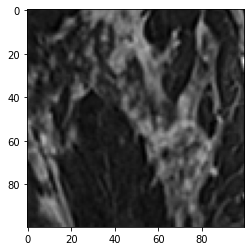

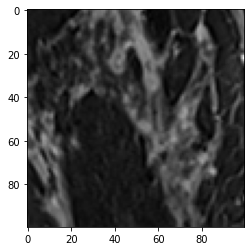

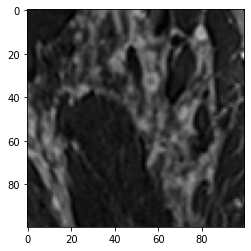

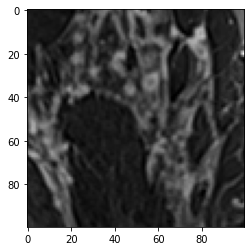

In [ ]:
#root="/content/drive/MyDrive/Breast_MRI_435/01-01-1990-NA-MRI BREAST BILATERAL WWO-13899/500.000000-ax 3d dyn MP-03912/1-"
root="/content/drive/MyDrive/Breast_MRI_474/13.000000-ax dyn 3rd pass-80755/1-"
#root="/content/drive/MyDrive/Breast_MRI_485/7.000000-ax dyn pre-43648/1-"
#root="/content/drive/MyDrive/Breast_MRI_476/500.000000-ax dynamic-69183/1-"
#root="/content/drive/MyDrive/Breast_MRI_477/7.000000-ax dyn pre-60940/1-"
#root="/content/drive/MyDrive/Breast_MRI_478/4.000000-ax dyn pre-73208/1-"
#root="/content/drive/MyDrive/Breast_MRI_479/4.000000-ax dyn pre-82744/1-"

filetype=".dcm"
#patient="patient"
#for i in range(len(subdf)):
x1=int(subdf1["Start Row"])
x2=int(subdf1["End Row"])
y1=int(subdf1["Start Column"])
y2=int(subdf1["End Column"])
#a=float(subdfc1["ER"])
#print(a)

#ciclo entre as slices onde existe tumor e converter dicom para imagem
tumor=np.empty(shape=(100,100,0))
for i in range(int(subdf1["Start Slice"]), int(subdf1["End Slice"]) + 1):
  if(x2-x1<100 and y2-y1<100):
    centerx=int((x2-x1)/2+x1)
    distx=int(centerx-100/2)
    centery=int((y2-y1)/2+y1)
    disty=int(centery-100/2)
    path=root+str(i).zfill(3)+filetype
    image=dicom.dcmread(path)
    name=int(subdfc1["Patient ID"])

    #converter a imgem em pixel e posteriormente num npy array
    tumor_slice=image.pixel_array[distx:distx+100,disty:disty+100]
    plt.imshow(tumor_slice,cmap=plt.cm.gray)
    tumor_slice=tumor_slice[:,:, np.newaxis]
    #tumor=np.concatenate((tumor,tumor_slice), axis=-1)
    plt.show()
    #antes o crop estava no formato (100,100,1) e convertemos para o formato(100,100)
    tumor_slice=tumor_slice.reshape(100,100)
    tumor_slice=tumor_slice.ravel()
    #os npy arrays sao guardados numa pasta conforme o ER for positivo ou negativo
    if(float(subdfc1["ER"])==1.0):
      np.save(os.path.join('/content/drive/MyDrive/TESE/ER_pos',"pos_"+str(name)+"_"+str(i)),tumor_slice)
    else:
      np.save(os.path.join('/content/drive/MyDrive/TESE/ER_neg',"neg_"+str(name)+"_"+str(i)),tumor_slice)

In [ ]:
#load do nparray guardado anteriormente
a=np.load("/content/drive/MyDrive/TESE/ER_neg/neg_474_100.npy")

In [ ]:
a

array([93, 63, 64, ..., 76, 68, 53], dtype=uint16)

In [ ]:
np.size(a)

10000

In [ ]:
#df=pd.DataFrame(mp_array).transpose()
#df

,Label,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,173,309,214,104,98,99,72,121,147,...,850,243,88,277,220,18,179,211,58,70


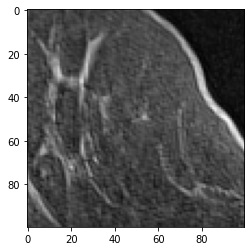

In [ ]:
#image=a.reshape(100,100)
#plt.imshow(image,cmap="gray")
#plt.show()

In [ ]:
#criamos um DataFrame com todos os npy arrays da pasta ER positivos
path_array = "/content/drive/MyDrive/TESE/ER_pos/"
dir_list = sorted(os.listdir(path_array))

df_final_pos=pd.DataFrame()
for x in dir_list:
  x=path_array+x
  numpy=np.load(x)
  df_x=pd.DataFrame(numpy).transpose()
  df_final_pos=df_final_pos.append(df_x)

df_final_pos
#dir_list

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,19,19,22,20,20,14,17,15,15,19,...,65,39,32,45,54,58,61,52,47,60
0,25,17,18,19,25,17,21,32,18,24,...,54,42,42,60,73,77,67,46,43,58
0,21,16,15,20,20,18,18,24,22,19,...,63,60,48,59,73,74,67,55,46,54
0,14,11,11,14,25,20,12,16,21,17,...,74,67,66,62,54,52,57,67,62,62
0,14,11,13,9,13,17,17,12,13,19,...,68,60,85,79,56,49,58,69,60,54
0,13,11,18,15,16,20,18,17,14,27,...,38,54,80,75,58,70,70,63,56,50
0,17,20,19,18,23,24,20,18,22,21,...,44,52,63,66,58,65,63,64,73,70
0,21,20,18,20,29,21,19,24,23,19,...,47,48,49,59,62,55,57,63,71,71
0,18,19,17,15,22,17,16,20,19,19,...,49,41,37,55,62,55,52,54,61,58
0,17,15,18,14,13,14,15,18,16,18,...,56,40,39,52,53,45,35,47,60,64


In [ ]:
#criamos um DataFrame com todos os npy arrays da pasta ER negativos
path_array = "/content/drive/MyDrive/TESE/ER_neg/"
dir_list = sorted(os.listdir(path_array))

df_final_neg=pd.DataFrame()
for x in dir_list:
  x=path_array+x
  numpy=np.load(x)
  df_x=pd.DataFrame(numpy).transpose()
  df_final_neg=df_final_neg.append(df_x)

df_final_neg

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,144,128,108,116,127,135,162,154,117,100,...,116,160,157,112,121,104,90,91,88,95
0,142,120,108,120,139,163,190,175,138,129,...,140,167,151,89,104,83,82,94,87,81
0,131,117,116,120,126,146,156,152,150,146,...,109,136,139,122,101,64,62,71,74,82
0,129,125,119,109,104,128,134,145,142,119,...,74,91,118,131,117,95,73,64,70,84
0,120,116,109,109,126,172,187,168,129,98,...,72,75,89,103,116,135,98,78,76,77
0,100,114,133,134,152,194,184,150,126,111,...,75,85,78,76,94,125,104,91,85,71
0,112,130,155,149,146,157,136,116,115,108,...,89,91,80,70,71,98,98,118,102,71
0,131,134,131,121,130,131,124,129,110,107,...,86,81,87,85,76,93,94,137,124,80
0,130,134,107,107,123,107,115,126,121,126,...,69,72,86,90,82,84,85,125,117,87
0,126,132,124,137,124,90,92,104,110,109,...,83,77,77,77,83,80,80,99,94,87


In [ ]:
#juntar os npy de ER pos e ER neg num no dataframe para termos dataframe para o treino 

df_final=df_final_neg.append(df_final_pos)
df_final

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,144,128,108,116,127,135,162,154,117,100,...,116,160,157,112,121,104,90,91,88,95
0,142,120,108,120,139,163,190,175,138,129,...,140,167,151,89,104,83,82,94,87,81
0,131,117,116,120,126,146,156,152,150,146,...,109,136,139,122,101,64,62,71,74,82
0,129,125,119,109,104,128,134,145,142,119,...,74,91,118,131,117,95,73,64,70,84
0,120,116,109,109,126,172,187,168,129,98,...,72,75,89,103,116,135,98,78,76,77
0,100,114,133,134,152,194,184,150,126,111,...,75,85,78,76,94,125,104,91,85,71
0,112,130,155,149,146,157,136,116,115,108,...,89,91,80,70,71,98,98,118,102,71
0,131,134,131,121,130,131,124,129,110,107,...,86,81,87,85,76,93,94,137,124,80
0,130,134,107,107,123,107,115,126,121,126,...,69,72,86,90,82,84,85,125,117,87
0,126,132,124,137,124,90,92,104,110,109,...,83,77,77,77,83,80,80,99,94,87


In [ ]:
df_final.to_csv(r'/content/drive/MyDrive/TESE/X_val.csv', index = False, header=True)